# 5. Re-run the model on IND with log-differenced updated data and using Enerdata

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [3]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDPb', 'EIc')
data.raw <- read.csv(file.path(data_dir, 'WB_IND_current.csv'))[cols]

log_cols <- c('EIc', 'P_GDPb', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1990 & year <= 2015)
data.log <- subset(data.log, year >= 1990 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1990 & year <= 2015)

data.logdiff

,year,ISG,TO,TI,P_GDPb,EIc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,1990,-0.09729799,0.33812942,0.046071350,NA,NA
32,1991,-1.01197532,1.48146504,-0.060706431,0.02337388,0.0304643674
33,1992,0.35102309,1.44537249,-0.048734533,0.05587541,-0.0174789222
34,1993,-0.01118899,1.21844074,0.082914210,0.05012392,-0.0226551031
35,1994,0.84664696,0.42660459,0.254892250,0.06616247,-0.0268426096
36,1995,0.97160818,2.78930433,0.313288901,0.07457547,-0.0171282991
37,1996,-0.68753905,-0.93796083,0.265428989,0.07197373,-0.0426611359
38,1997,-0.07523961,0.68989900,0.170632387,0.03810484,-0.0007793251
39,1998,-0.53399291,1.08008321,-0.125865835,0.05280292,-0.0363090272


In [4]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60572 -0.07487  0.01473  0.08167  0.35833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.09830    0.03683   2.669   0.0134 * 
ISG          0.14119    0.04881   2.893   0.0080 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1878 on 24 degrees of freedom
Multiple R-squared:  0.2585,	Adjusted R-squared:  0.2276 
F-statistic: 8.367 on 1 and 24 DF,  p-value: 0.007999


In [5]:
summary(lm('P_GDPb ~ TO', data=data.logdiff))


Call:
lm(formula = "P_GDPb ~ TO", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040387 -0.013820  0.001326  0.013516  0.029676 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.064791   0.004036  16.052 5.49e-14 ***
TO          -0.000695   0.001073  -0.648    0.523    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01937 on 23 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01792,	Adjusted R-squared:  -0.02478 
F-statistic: 0.4197 on 1 and 23 DF,  p-value: 0.5235


In [6]:
summary(lm('EIc ~ ISG + TO + TI + P_GDPb', data=data.logdiff))


Call:
lm(formula = "EIc ~ ISG + TO + TI + P_GDPb", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030040 -0.011580 -0.003575  0.014871  0.040338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0390611  0.0138916   2.812 0.010771 *  
ISG          0.0082101  0.0061029   1.345 0.193589    
TO          -0.0006167  0.0011471  -0.538 0.596768    
TI          -0.0273579  0.0196063  -1.395 0.178209    
P_GDPb      -0.9246089  0.2003664  -4.615 0.000168 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.018 on 20 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5348,	Adjusted R-squared:  0.4417 
F-statistic: 5.747 on 4 and 20 DF,  p-value: 0.003015


In [7]:
model.path <- '
## path model
EIc ~ p_eic_isg*ISG + p_eic_to*TO + p_eic_ti*TI + p_eic_pgdpb*P_GDPb
TI ~ p_ti_isg*ISG
P_GDPb ~ p_pgdpb_to*TO
## indirect effect
p_eic_ti_isg := p_eic_ti*p_ti_isg
p_eic_pgdpb_to := p_eic_pgdpb*p_pgdpb_to
## total effect
p_eic_isg_total := p_eic_isg + (p_eic_ti*p_ti_isg)
p_eic_to_total := p_eic_to + (p_eic_pgdpb*p_pgdpb_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE)
# capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
#         '../tex/plots/model.logdiff.fit.summary.tex')
# capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
#         '../tex/plots/model.logdiff.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

lavaan 0.6-5 ended normally after 68 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            26
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 1.680       1.923
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.641       0.589
  Scaling correction factor                                  0.874
    for the Yuan-Bentler correction (Mplus variant) 

Model Test Baseline Model:

  Test statistic                                29.039      29.726
  Degrees of freedom                                 9     

In [8]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
fit.measures <- as.data.frame(fitMeasures(model.path.fit))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [9]:
%get soln.std --from R
%get r.square --from R
%get fit.measures --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square
Variable fit.measures is put to SoS as fit_measures


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EIc,~,ISG,0.255,0.170,1.499,0.134,-0.078,0.589
1,EIc,~,TO,-0.090,0.237,-0.380,0.704,-0.555,0.375
2,EIc,~,TI,-0.236,0.099,-2.376,0.018,-0.431,-0.041
3,EIc,~,P_GDPb,-0.714,0.091,-7.874,0.000,-0.891,-0.536
4,TI,~,ISG,0.508,0.091,5.598,0.000,0.330,0.686
5,P_GDPb,~,TO,-0.131,0.166,-0.790,0.430,-0.458,0.195
6,EIc,~~,EIc,0.439,0.118,3.736,0.000,0.209,0.670
7,TI,~~,TI,0.742,0.092,8.028,0.000,0.560,0.923
8,P_GDPb,~~,P_GDPb,0.983,0.044,22.469,0.000,0.897,1.068
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EIc       0.560504
TI        0.258500
P_GDPb    0.017270
dtype: float64

In [10]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDPb ~ TO', 'EIc ~ ISG', 'EIc ~ TO', 'EIc ~ TI', 'EIc ~ P_GDPb']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDPb', r'P\_GDPb')
df['Ind. var.'] = df.rhs.str.replace('P_GDPb', r'P\_GDPb')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDPb', r'P\_GDPb')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDPb', 'EIc']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",0.508,0.091,*,0.258
P_GDPb ~ TO,2,P\_GDPb,TO,"$P_{P\_GDPb,TO}$",-0.131,0.166,0.430,0.017
EIc ~ ISG,3,EIc,ISG,"$P_{EIc,ISG}$",0.255,0.170,0.134,0.561
EIc ~ TO,,EIc,TO,"$P_{EIc,TO}$",-0.090,0.237,0.704,
EIc ~ TI,,EIc,TI,"$P_{EIc,TI}$",-0.236,0.099,0.018,
EIc ~ P_GDPb,,EIc,P\_GDPb,"$P_{EIc,P\_GDPb}$",-0.714,0.091,*,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &        Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &       $P_{TI,ISG}$ &        0.508 &        0.091 &       * &   0.258 \\
       2 &   P\_GDPb &        TO &   $P_{P\_GDPb,TO}$ &       -0.131 &        0.166 &   0.430 &   0.017 \\
       3 &       EIc &       ISG &      $P_{EIc,ISG}$ &        0.255 &        0.170 &   0.134 &   0.561 \\
         &       EIc &        TO &       $P_{EIc,TO}$ &       -0.090 &        0.237 &   0.704 &         \\
         &       EIc &        TI &       $P_{EIc,TI}$ &       -0.236 &        0.099 &   0.018 &         \\
         &       EIc &   P\_GDPb &  $P_{EIc,P\_GDPb}$ &       -0.714 &        0.091 &       * &         \\
\bottomrule
\end{tabular}



In [11]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDPb'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EIc ~ ISG,EIc,~,ISG,0.255,0.170,1.499,0.134,-0.078,0.589
EIc ~ TO,EIc,~,TO,-0.090,0.237,-0.380,0.704,-0.555,0.375
EIc ~ TI,EIc,~,TI,-0.236,0.099,-2.376,0.018,-0.431,-0.041
EIc ~ P_GDPb,EIc,~,P_GDPb,-0.714,0.091,-7.874,0.000,-0.891,-0.536
TI ~ ISG,TI,~,ISG,0.508,0.091,5.598,0.000,0.330,0.686
P_GDPb ~ TO,P_GDPb,~,TO,-0.131,0.166,-0.790,0.430,-0.458,0.195
p_eic_ti_isg,p_eic_ti_isg,:=,p_eic_ti*p_ti_isg,-0.120,0.058,-2.069,0.039,-0.234,-0.006
p_eic_pgdpb_to,p_eic_pgdpb_to,:=,p_eic_pgdpb*p_pgdpb_to,0.094,0.119,0.787,0.431,-0.140,0.327
p_eic_isg_total,p_eic_isg_total,:=,p_eic_isg+(p_eic_ti*p_ti_isg),0.135,0.143,0.946,0.344,-0.145,0.415
p_eic_to_total,p_eic_to_total,:=,p_eic_to+(p_eic_pgdpb*p_pgdpb_to),0.004,0.283,0.013,0.989,-0.551,0.559


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.255,0.170,0.134,-0.120,0.058,0.039,0.135,0.143,0.344
1,TO,-0.090,0.237,0.704,0.094,0.119,0.431,0.004,0.283,0.989
2,TI,-0.236,0.099,0.018,,,,-0.236,0.099,0.018
3,P\_GDPb,-0.714,0.091,*,,,,-0.714,0.091,*


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.255 &   0.170 &      0.134 &    -0.120 &   0.058 &      0.039 &     0.135 &   0.143 &      0.344 \\
             TO &    -0.090 &   0.237 &      0.704 &     0.094 &   0.119 &      0.431 &     0.004 &   0.283 &      0.989 \\
             TI &    -0.236 &   0.099 &      0.018 &           &         &            &    -0.236 &   0.099 &      0.018 \\
        P\_GDPb &    -0.714 &   0.091 &          * &           &         &            &    -0.714 &   0.091 &          * \\
\bottomrule
\end{tabular}



In [12]:
fit_table = fit_measures.loc[['pvalue.scaled', 'rmsea.robust', 'cfi.robust', 'srmr']]
fit_table.index = [r'$\chi^2$', 'RMSEA', 'CFI', 'SRMR']
fit_table.columns = ['value']
fit_table['cut-off'] = ['$> 0.05$', '$<0.08$', '$\geq 0.90$', '$<0.08$']
display(np.round(fit_table, 3))
print(np.round(fit_table, 3).to_latex(escape=False))

,value,cut-off
$\chi^2$,0.589,$> 0.05$
RMSEA,0.000,$<0.08$
CFI,1.000,$\geq 0.90$
SRMR,0.066,$<0.08$


\begin{tabular}{lrl}
\toprule
{} &  value &      cut-off \\
\midrule
$\chi^2$ &  0.589 &     $> 0.05$ \\
RMSEA    &  0.000 &      $<0.08$ \\
CFI      &  1.000 &  $\geq 0.90$ \\
SRMR     &  0.066 &      $<0.08$ \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.598e-01 -1.443e-03 -1.000e-08  3.817e-03  9.032e-04  2.178e-01 

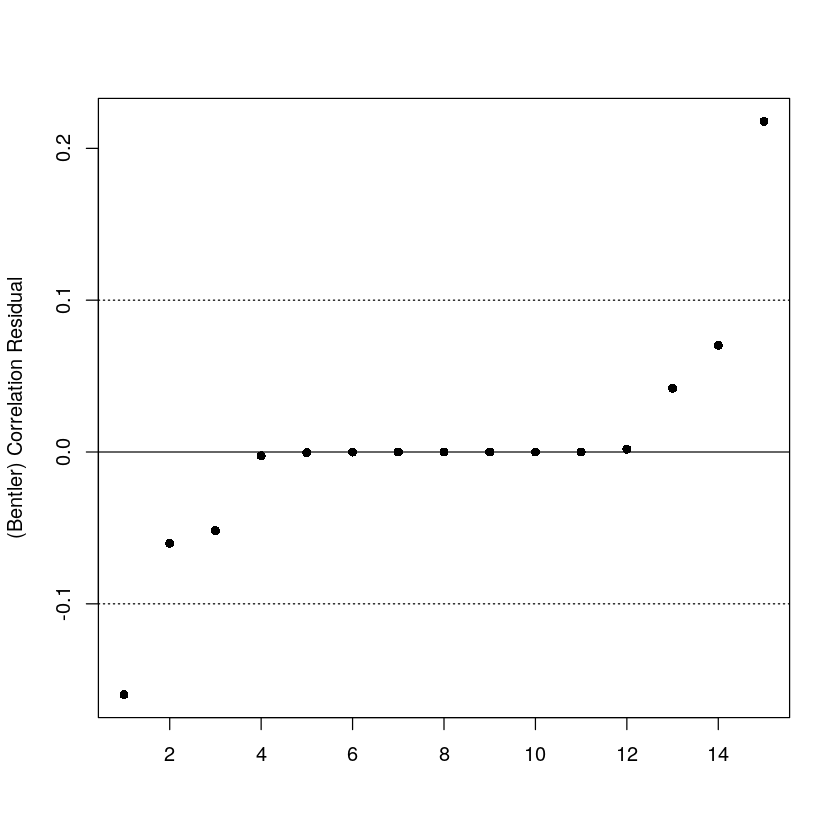

In [13]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [14]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


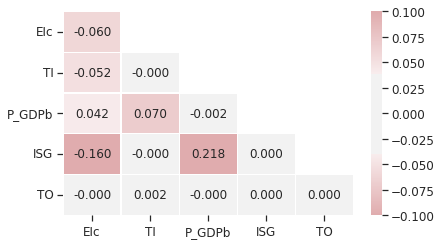

In [15]:
plot_corr_resid(model_path_fit_resid)
save_fig('ind_correlation_residuals.pdf')


Call:
lm(formula = data.logdiff$EIc ~ resid)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0047928 -0.0029283 -0.0002615  0.0021019  0.0075611 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0235261  0.0006972  -33.74   <2e-16 ***
resid        0.9775185  0.0291729   33.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003486 on 23 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9799,	Adjusted R-squared:  0.9791 
F-statistic:  1123 on 1 and 23 DF,  p-value: < 2.2e-16


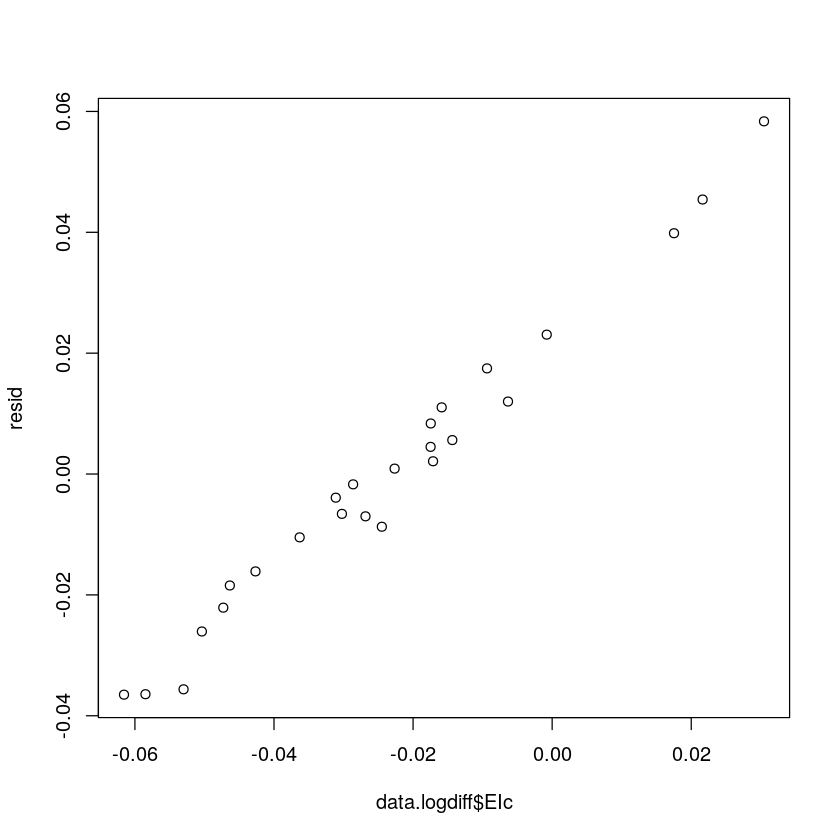

In [16]:
resid <- residuals_lavaan(model.path.fit)$EIc
summary(lm(data.logdiff$EIc ~ resid))
plot(data.logdiff$EIc, resid)